<h2>Message Encryption and Decryption in Dollar Image Using Bit-Plane Slicing Technique</h2>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img = cv2.imread("Dollar.jpg",0)

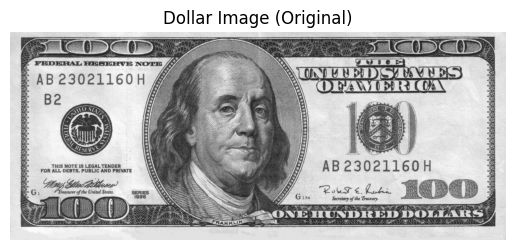

In [3]:
plt.imshow(img,cmap='gray')
plt.title("Dollar Image (Original)")
plt.axis("off")
plt.show()

In [4]:
def bitPlaneSlicing(r,bit_plane):
    dec = np.binary_repr(r,width=8)
    return int(dec[8-bit_plane])

In [5]:
bitPlaneSlicingVec = np.vectorize(bitPlaneSlicing)

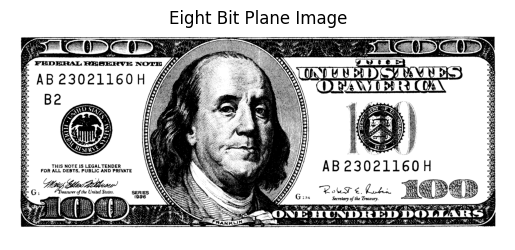

In [6]:
eightBitPlane = bitPlaneSlicingVec(img,bit_plane=8)
plt.imshow(eightBitPlane,cmap='gray')
plt.axis('off')
plt.title("Eight Bit Plane Image")
plt.show()

In [7]:
bit_planes_dict = {}
for bit_plane in np.arange(8,0,-1):
    bit_planes_dict['bit_plane_'+str(bit_plane)] = bitPlaneSlicingVec(img,bit_plane=bit_plane)

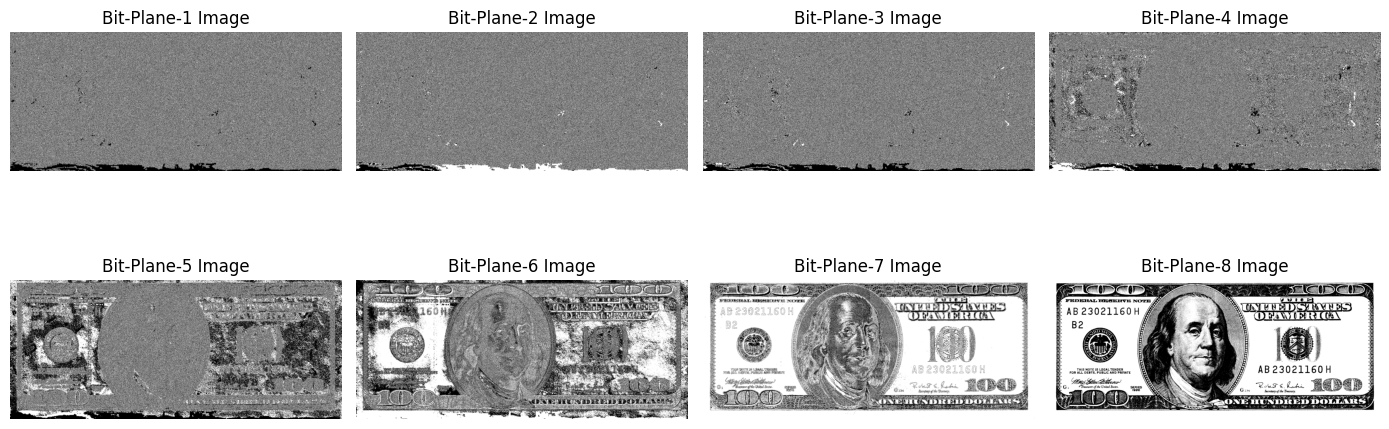

In [8]:
fig , axs = plt.subplots(2,4,figsize=(14,6))
axs = axs.flatten()
for i in range(8,0,-1):
    axs[i-1].imshow(bit_planes_dict['bit_plane_'+str(i)],cmap='gray')
    axs[i-1].axis('off')
    title = "Bit-Plane-"+str(i)+" Image"
    axs[i-1].set_title(title)
plt.tight_layout()
plt.show()

In [9]:
bit_planes_dict['bit_plane_1']

array([[1, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(1536, 3660))

In [10]:
chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZ _-*&^%$#@!~`+=\|;:><?/.,"
chars = [c for c in chars]
charcodes = []
binary_codes_strs = []
for i in range(len(chars)):
    charcode = ord(chars[i])
    charcodes.append(charcode)
    binary_codes_strs.append(bin(charcode)[2:])

In [11]:
charscode_table = pd.DataFrame({
    "CHARACTERS":chars,
    "CHARACTER CODES":charcodes,
    "BINARY CHARACTER CODES":binary_codes_strs
})

In [12]:
charscode_table

,CHARACTERS,CHARACTER CODES,BINARY CHARACTER CODES
0,A,65,1000001
1,B,66,1000010
2,C,67,1000011
3,D,68,1000100
4,E,69,1000101
5,F,70,1000110
6,G,71,1000111
7,H,72,1001000
8,I,73,1001001
9,J,74,1001010


In [13]:
binary_codes = []
for code in binary_codes_strs:
    bc = [int(c) for c in code]
    binary_codes.append(bc)

In [14]:
binary_codes

[[1, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 0],
 [1, 0, 0, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 1, 0, 1, 0],
 [1, 0, 0, 1, 0, 1, 1],
 [1, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 1, 1, 1, 0],
 [1, 0, 0, 1, 1, 1, 1],
 [1, 0, 1, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 1],
 [1, 0, 1, 0, 0, 1, 0],
 [1, 0, 1, 0, 0, 1, 1],
 [1, 0, 1, 0, 1, 0, 0],
 [1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 1, 0],
 [1, 0, 1, 0, 1, 1, 1],
 [1, 0, 1, 1, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 1],
 [1, 0, 1, 1, 0, 1, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 0, 1],
 [1, 0, 1, 0, 1, 0],
 [1, 0, 0, 1, 1, 0],
 [1, 0, 1, 1, 1, 1, 0],
 [1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 0],
 [1, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 1],
 [1, 1, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 1, 0, 0]

In [15]:
for i in range(bit_planes_dict['bit_plane_1'].shape[0]):
    # print(bit_planes_dict['bit_plane_1'][i])
    bit_planes_dict['bit_plane_1'][i][0:9] = 0 

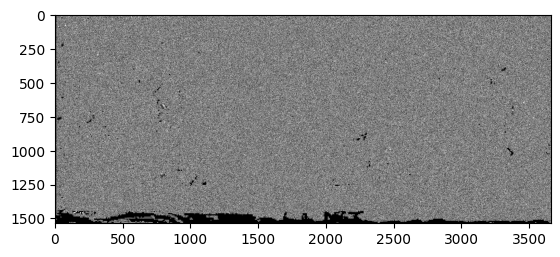

In [16]:
plt.imshow(bit_planes_dict['bit_plane_1'],cmap='gray')

In [17]:
msg = 'This is a simple message.'
msg=msg.upper()
msg_binary = []
for i,m in enumerate(msg):
    code_loc = chars.index(m)
    msg_binary.append(binary_codes[code_loc])
    print(f"{m} : {binary_codes[code_loc]}")

T : [1, 0, 1, 0, 1, 0, 0]
H : [1, 0, 0, 1, 0, 0, 0]
I : [1, 0, 0, 1, 0, 0, 1]
S : [1, 0, 1, 0, 0, 1, 1]
  : [1, 0, 0, 0, 0, 0]
I : [1, 0, 0, 1, 0, 0, 1]
S : [1, 0, 1, 0, 0, 1, 1]
  : [1, 0, 0, 0, 0, 0]
A : [1, 0, 0, 0, 0, 0, 1]
  : [1, 0, 0, 0, 0, 0]
S : [1, 0, 1, 0, 0, 1, 1]
I : [1, 0, 0, 1, 0, 0, 1]
M : [1, 0, 0, 1, 1, 0, 1]
P : [1, 0, 1, 0, 0, 0, 0]
L : [1, 0, 0, 1, 1, 0, 0]
E : [1, 0, 0, 0, 1, 0, 1]
  : [1, 0, 0, 0, 0, 0]
M : [1, 0, 0, 1, 1, 0, 1]
E : [1, 0, 0, 0, 1, 0, 1]
S : [1, 0, 1, 0, 0, 1, 1]
S : [1, 0, 1, 0, 0, 1, 1]
A : [1, 0, 0, 0, 0, 0, 1]
G : [1, 0, 0, 0, 1, 1, 1]
E : [1, 0, 0, 0, 1, 0, 1]
. : [1, 0, 1, 1, 1, 0]


In [18]:
# print(len(msg_binary))
for i in range(len(msg_binary)):
    if len(msg_binary[i]) == 8:
        # print(msg_binary[0:8])
        bit_planes_dict['bit_plane_1'][i][0:8] = msg_binary[i][0:8] 
    elif len(msg_binary[i]) == 7:
        # print(msg_binary[0:7])
        bit_planes_dict['bit_plane_1'][i][1:8] = msg_binary[i][0:7]
    elif len(msg_binary[i]) == 6:
        # print(msg_binary[0:6])
        bit_planes_dict['bit_plane_1'][i][2:8] = msg_binary[i][0:6]     

In [19]:
bit_planes_dict['bit_plane_1'][1][0:8]

array([0, 1, 0, 0, 1, 0, 0, 0])

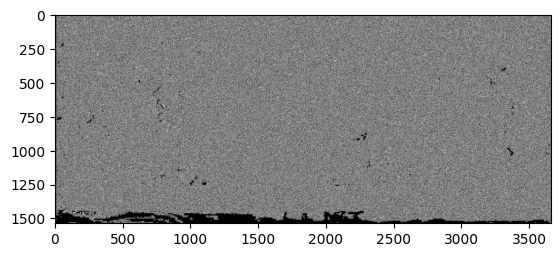

In [20]:
plt.imshow(bit_planes_dict['bit_plane_1'],cmap='gray')

In [75]:
i = 0
list_check = bit_planes_dict['bit_plane_1'][i][0:8]
while list_check.sum()!=0:
    i = i+1
    print(list_check)
    list_check = bit_planes_dict['bit_plane_1'][i][0:8]
print(i)    

[0 1 0 1 0 1 0 0]
[0 1 0 0 1 0 0 0]
[0 1 0 0 1 0 0 1]
[0 1 0 1 0 0 1 1]
[0 0 1 0 0 0 0 0]
[0 1 0 0 1 0 0 1]
[0 1 0 1 0 0 1 1]
[0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 1]
[0 0 1 0 0 0 0 0]
[0 1 0 1 0 0 1 1]
[0 1 0 0 1 0 0 1]
[0 1 0 0 1 1 0 1]
[0 1 0 1 0 0 0 0]
[0 1 0 0 1 1 0 0]
[0 1 0 0 0 1 0 1]
[0 0 1 0 0 0 0 0]
[0 1 0 0 1 1 0 1]
[0 1 0 0 0 1 0 1]
[0 1 0 1 0 0 1 1]
[0 1 0 1 0 0 1 1]
[0 1 0 0 0 0 0 1]
[0 1 0 0 0 1 1 1]
[0 1 0 0 0 1 0 1]
[0 0 1 0 1 1 1 0]
25


In [76]:
i = 0
# Decrypted text from image
decrypted_msg = ''
list_check = bit_planes_dict['bit_plane_1'][i][0:8]
while list_check.sum()!=0:
    i = i+1
    if list_check[0] == 0 and list_check[1] == 0:
        list_check = list_check[2:]
    elif list_check[0] == 0:
        list_check = list_check[1:]
    elif list_check[0] == 1:
        list_check = list_check
    charcode = ''.join(str(e) for e in list_check)
    decrypted_msg += (chars[binary_codes_strs.index(charcode)])
    list_check = bit_planes_dict['bit_plane_1'][i][0:8]

In [77]:
print(decrypted_msg.lower())

this is a simple message.
